## Importing all the necessary libraries

In [1]:
import snowflake.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# Suppress warnings
warnings.filterwarnings("ignore")

## Importing & Understanding the dataset

In [3]:
try:
    # Connect to Snowflake using environment variables
    conn = snowflake.connector.connect(
        user="kaustubh",
        password="@@Kaustubh123",
        account="rh57156.central-india.azure",
        warehouse="COMPUTE_WH",
        database="Main_Project",
        schema="Main_Project_Schema_Mart",
        role = "ACCOUNTADMIN"
    )

    # Print connection success message
    print("Connected to Snowflake successfully!")

    # Now, you can perform further operations with snowflake_conn
except snowflake.connector.errors.DatabaseError as e:
    # Print connection failure message
    print(f"Failed to connect to Snowflake: {e}")

Connected to Snowflake successfully!


In [4]:
cur = conn.cursor()

# Execute SQL query to fetch data
sql_query = f"SELECT * FROM TOTALINFO"
cur.execute(sql_query)

# Fetch data into a pandas DataFrame
data = cur.fetchall()
columns = [col[0] for col in cur.description]
df = pd.DataFrame(data, columns=columns)

# Close cursor and connection
cur.close()
conn.close()


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4068 entries, 0 to 4067
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   USERID                               4068 non-null   object 
 1   FULLNAME                             4068 non-null   object 
 2   EMAIL                                4068 non-null   object 
 3   PHONENUMBER                          4068 non-null   object 
 4   GENDER                               4068 non-null   object 
 5   DOJ                                  4068 non-null   object 
 6   SPECIALIZATION                       4068 non-null   object 
 7   DOB                                  4068 non-null   object 
 8   CITY                                 4068 non-null   object 
 9   STATE                                4068 non-null   object 
 10  EXPERIENCE                           4068 non-null   int64  
 11  USERTYPE                      

In [6]:
df.head()

,USERID,FULLNAME,EMAIL,PHONENUMBER,GENDER,DOJ,SPECIALIZATION,DOB,CITY,STATE,...,TRAINERSPECIALIZATION,TRAININGNAME,OPTIMIZEDDURATION,DIFFICULTYLEVEL,TRAININGSTATUS,ASSESSMENT_PERCENTAGE_DONE,ASSESSMENT_COMPLETION_TIME_IN_HOURS,SCOREACHIEVEDINQUIZ,QUIZPASSEDORFAILED,RATINGGIVENBYTRAINER
0,Emp_181,Andrew Cole,davisgregory@example.org,-9025,Female,23-09-2020,[Continuous Deployment,09-09-1996,South Taylorberg,North Carolina,...,"['Ruby', 'Statistical Analysis', 'Kubernetes',...",Machine Learning Basics,24.0,moderate,in_progress,87.0,NaN,NaN,,4.0
1,Emp_181,Andrew Cole,davisgregory@example.org,-9025,Female,23-09-2020,GraphQL,09-09-1996,South Taylorberg,North Carolina,...,"['Ruby', 'Statistical Analysis', 'Kubernetes',...",Machine Learning Basics,24.0,moderate,in_progress,87.0,NaN,NaN,,4.0
2,Emp_181,Andrew Cole,davisgregory@example.org,-9025,Female,23-09-2020,PostgreSQL,09-09-1996,South Taylorberg,North Carolina,...,"['Ruby', 'Statistical Analysis', 'Kubernetes',...",Machine Learning Basics,24.0,moderate,in_progress,87.0,NaN,NaN,,4.0
3,Emp_181,Andrew Cole,davisgregory@example.org,-9025,Female,23-09-2020,Node.js],09-09-1996,South Taylorberg,North Carolina,...,"['Ruby', 'Statistical Analysis', 'Kubernetes',...",Machine Learning Basics,24.0,moderate,in_progress,87.0,NaN,NaN,,4.0
4,Emp_172,Jonathan Patel,gonzalesbrian@example.org,001-515-605-2768x915,Male,13-01-2021,[MongoDB,14-07-1939,West Paulland,Vermont,...,None,Data Science Essentials,23.0,easy,pending,0.0,NaN,NaN,,4.0


In [7]:
df['SPECIALIZATION'] = df['SPECIALIZATION'].str.replace(r"[\[\],]", '', regex=True)

In [8]:
df.describe()

,EXPERIENCE,TRAINERRATING,OPTIMIZEDDURATION,ASSESSMENT_PERCENTAGE_DONE,ASSESSMENT_COMPLETION_TIME_IN_HOURS,SCOREACHIEVEDINQUIZ,RATINGGIVENBYTRAINER
count,4068.000000,712.000000,4032.000000,4048.000000,1360.000000,1360.000000,4048.000000
mean,11.942970,3.168539,19.305556,50.251976,29.597059,48.055882,2.901186
std,5.962813,1.557061,11.085285,44.482481,17.418351,28.497108,1.405316
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,7.000000,2.000000,9.000000,0.000000,13.750000,23.000000,2.000000
50%,13.000000,3.000000,20.000000,54.000000,29.000000,49.500000,3.000000
75%,17.000000,5.000000,29.000000,100.000000,44.000000,70.250000,4.000000
max,20.000000,5.000000,39.000000,100.000000,60.000000,100.000000,5.000000


In [9]:
df.nunique()

USERID                                 197
FULLNAME                               197
EMAIL                                  197
PHONENUMBER                            197
GENDER                                   2
DOJ                                    184
SPECIALIZATION                         101
DOB                                    195
CITY                                   194
STATE                                   49
EXPERIENCE                              20
USERTYPE                                 2
SUBSCRIBENEWSLETTER                      2
TRAININGID                             100
TRAINERID                                1
TRAINERNAME                             14
TRAINERDESIGNATION                      12
TRAINERRATING                            4
TRAINERSPECIALIZATION                   16
TRAININGNAME                            10
OPTIMIZEDDURATION                       33
DIFFICULTYLEVEL                          3
TRAININGSTATUS                           3
ASSESSMENT_

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4068 entries, 0 to 4067
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   USERID                               4068 non-null   object 
 1   FULLNAME                             4068 non-null   object 
 2   EMAIL                                4068 non-null   object 
 3   PHONENUMBER                          4068 non-null   object 
 4   GENDER                               4068 non-null   object 
 5   DOJ                                  4068 non-null   object 
 6   SPECIALIZATION                       4068 non-null   object 
 7   DOB                                  4068 non-null   object 
 8   CITY                                 4068 non-null   object 
 9   STATE                                4068 non-null   object 
 10  EXPERIENCE                           4068 non-null   int64  
 11  USERTYPE                      

## Handling Missing Values and outliers

In [11]:
df = df.dropna(subset=['DIFFICULTYLEVEL'])
df = df.dropna(subset=['TRAININGNAME'])
df = df.dropna(subset=['OPTIMIZEDDURATION'])
df = df.dropna(subset=['TRAINERRATING'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 4047
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   USERID                               712 non-null    object 
 1   FULLNAME                             712 non-null    object 
 2   EMAIL                                712 non-null    object 
 3   PHONENUMBER                          712 non-null    object 
 4   GENDER                               712 non-null    object 
 5   DOJ                                  712 non-null    object 
 6   SPECIALIZATION                       712 non-null    object 
 7   DOB                                  712 non-null    object 
 8   CITY                                 712 non-null    object 
 9   STATE                                712 non-null    object 
 10  EXPERIENCE                           712 non-null    int64  
 11  USERTYPE                            

## Removing The NaN Values

In [13]:
df['SCOREACHIEVEDINQUIZ'].fillna(df['SCOREACHIEVEDINQUIZ'].median(), inplace=True)
df['ASSESSMENT_COMPLETION_TIME_IN_HOURS'].fillna(df['ASSESSMENT_COMPLETION_TIME_IN_HOURS'].median(), inplace=True)
df['TRAINERRATING'].fillna(df['TRAINERRATING'].median(), inplace=True)

In [14]:
df.drop_duplicates(keep='first', inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 4047
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   USERID                               712 non-null    object 
 1   FULLNAME                             712 non-null    object 
 2   EMAIL                                712 non-null    object 
 3   PHONENUMBER                          712 non-null    object 
 4   GENDER                               712 non-null    object 
 5   DOJ                                  712 non-null    object 
 6   SPECIALIZATION                       712 non-null    object 
 7   DOB                                  712 non-null    object 
 8   CITY                                 712 non-null    object 
 9   STATE                                712 non-null    object 
 10  EXPERIENCE                           712 non-null    int64  
 11  USERTYPE                            

In [16]:
df.head()

,USERID,FULLNAME,EMAIL,PHONENUMBER,GENDER,DOJ,SPECIALIZATION,DOB,CITY,STATE,...,TRAINERSPECIALIZATION,TRAININGNAME,OPTIMIZEDDURATION,DIFFICULTYLEVEL,TRAININGSTATUS,ASSESSMENT_PERCENTAGE_DONE,ASSESSMENT_COMPLETION_TIME_IN_HOURS,SCOREACHIEVEDINQUIZ,QUIZPASSEDORFAILED,RATINGGIVENBYTRAINER
0,Emp_181,Andrew Cole,davisgregory@example.org,-9025,Female,23-09-2020,Continuous Deployment,09-09-1996,South Taylorberg,North Carolina,...,"['Ruby', 'Statistical Analysis', 'Kubernetes',...",Machine Learning Basics,24.0,moderate,in_progress,87.0,34.0,52.0,,4.0
1,Emp_181,Andrew Cole,davisgregory@example.org,-9025,Female,23-09-2020,GraphQL,09-09-1996,South Taylorberg,North Carolina,...,"['Ruby', 'Statistical Analysis', 'Kubernetes',...",Machine Learning Basics,24.0,moderate,in_progress,87.0,34.0,52.0,,4.0
2,Emp_181,Andrew Cole,davisgregory@example.org,-9025,Female,23-09-2020,PostgreSQL,09-09-1996,South Taylorberg,North Carolina,...,"['Ruby', 'Statistical Analysis', 'Kubernetes',...",Machine Learning Basics,24.0,moderate,in_progress,87.0,34.0,52.0,,4.0
3,Emp_181,Andrew Cole,davisgregory@example.org,-9025,Female,23-09-2020,Node.js,09-09-1996,South Taylorberg,North Carolina,...,"['Ruby', 'Statistical Analysis', 'Kubernetes',...",Machine Learning Basics,24.0,moderate,in_progress,87.0,34.0,52.0,,4.0
28,Emp_21,Sarah Crawford,williamwilliams@example.org,+1-611-901-9789x3062,Female,14-04-2022,Git,24-05-1967,Stephanieton,New Jersey,...,"['Ruby', 'Statistical Analysis', 'Kubernetes',...",Machine Learning Basics,24.0,moderate,in_progress,67.0,34.0,52.0,,5.0


## Finding Correlation Between different Categorical Columns

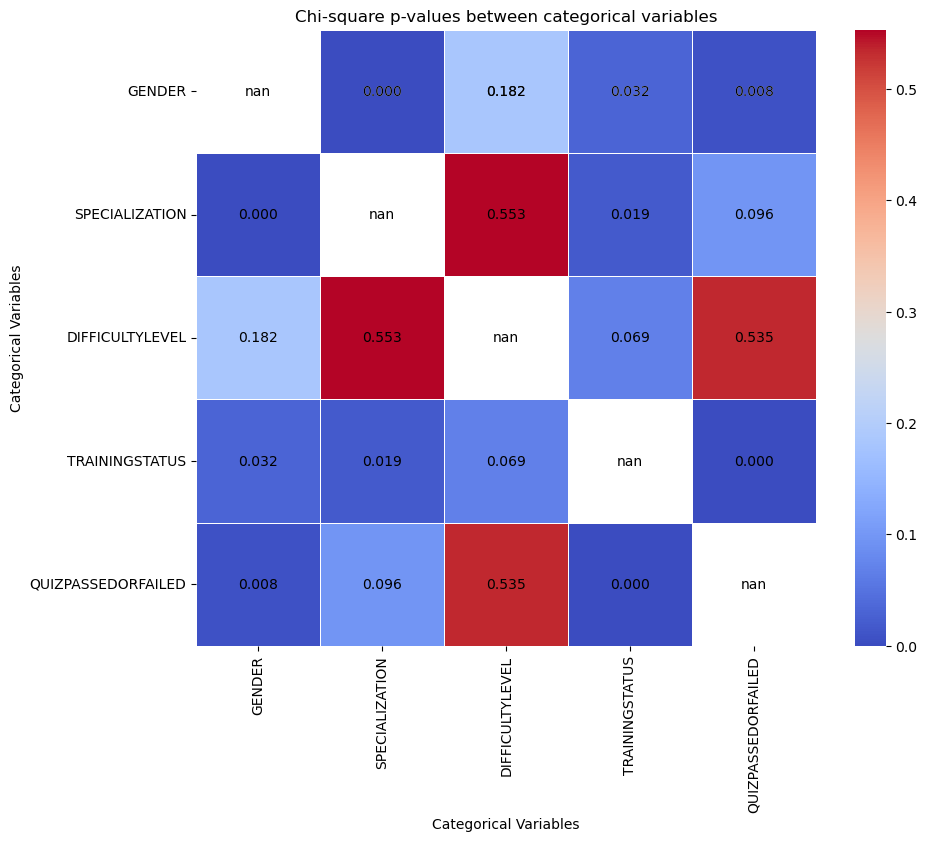

In [17]:
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame
# Selecting only the categorical columns
categorical_columns = ['GENDER', 'SPECIALIZATION', 'DIFFICULTYLEVEL', 'TRAININGSTATUS', 'QUIZPASSEDORFAILED']

# Create an empty DataFrame to store the chi-square p-values
chi_square_results = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Compute chi-square statistic and p-values for each pair of categorical columns
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            # Create a contingency table
            contingency_table = pd.crosstab(df[col1], df[col2])
            # Compute chi-square statistic and p-value
            chi2, p, _, _ = chi2_contingency(contingency_table)
            # Store the p-value in the DataFrame
            chi_square_results.loc[col1, col2] = p

# Convert p-values to numeric format
chi_square_results = chi_square_results.astype(float)

# Create a heatmap plot of the p-values with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(chi_square_results, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Chi-square p-values between categorical variables")
plt.xlabel("Categorical Variables")
plt.ylabel("Categorical Variables")

# Annotate each cell with its value
for i in range(len(categorical_columns)):
    for j in range(len(categorical_columns)):
        plt.text(j+0.5, i+0.5, f"{chi_square_results.iloc[i, j]:.3f}", ha="center", va="center")

plt.show()

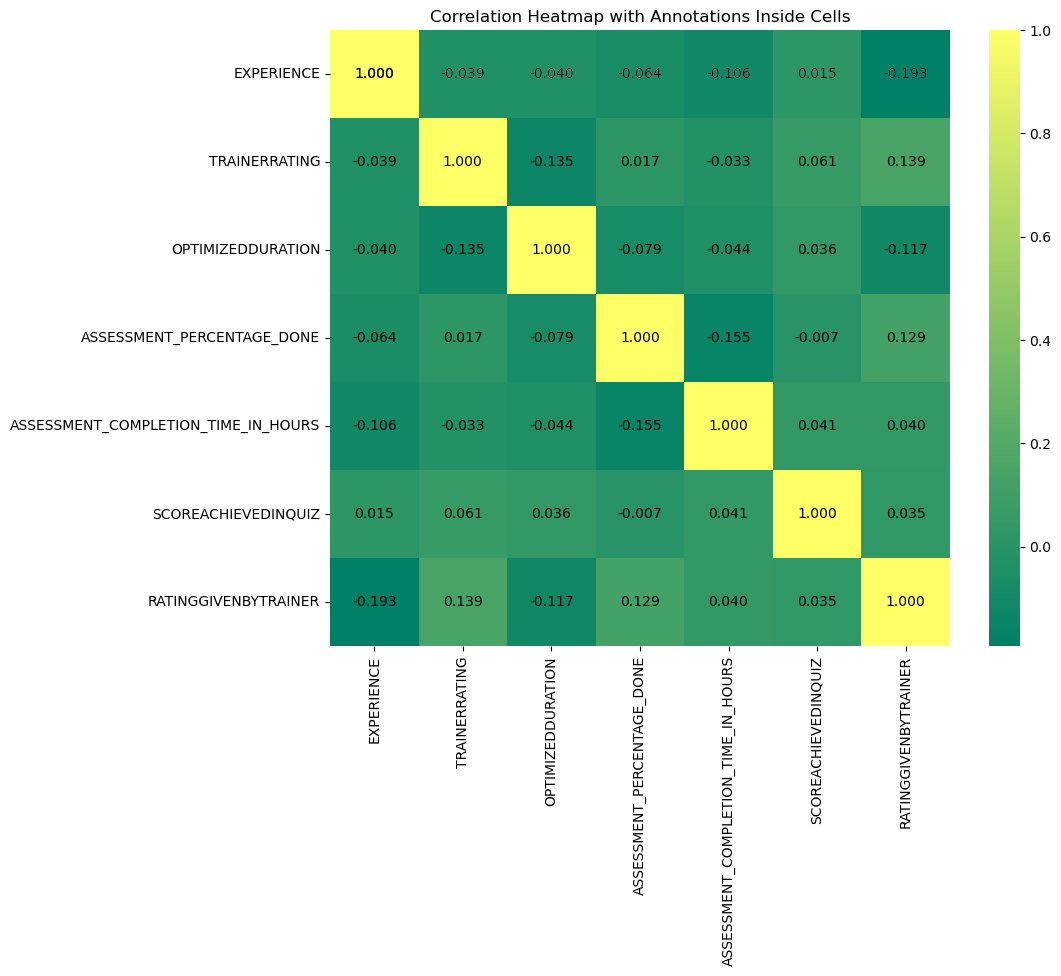

In [18]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='summer', annot=True, fmt=".3f")

# Add annotations to each cell
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j+0.5, i+0.5, "%.3f" % correlation_matrix.iloc[i, j], ha='center', va='center', color='black')

plt.title('Correlation Heatmap with Annotations Inside Cells')
plt.show()

## Keeping the only columns that are required

In [19]:
df = df[['GENDER', 'SPECIALIZATION', 'EXPERIENCE', 'DIFFICULTYLEVEL','TRAINERRATING', 'TRAININGNAME', 'OPTIMIZEDDURATION', 'SCOREACHIEVEDINQUIZ', 'ASSESSMENT_COMPLETION_TIME_IN_HOURS']]
df

,GENDER,SPECIALIZATION,EXPERIENCE,DIFFICULTYLEVEL,TRAINERRATING,TRAININGNAME,OPTIMIZEDDURATION,SCOREACHIEVEDINQUIZ,ASSESSMENT_COMPLETION_TIME_IN_HOURS
0,Female,Continuous Deployment,17,moderate,1.0,Machine Learning Basics,24.0,52.0,34.0
1,Female,GraphQL,17,moderate,1.0,Machine Learning Basics,24.0,52.0,34.0
2,Female,PostgreSQL,17,moderate,1.0,Machine Learning Basics,24.0,52.0,34.0
3,Female,Node.js,17,moderate,1.0,Machine Learning Basics,24.0,52.0,34.0
28,Female,Git,13,moderate,1.0,Machine Learning Basics,24.0,52.0,34.0
...,...,...,...,...,...,...,...,...,...
4039,Female,Git,5,moderate,2.0,Frontend Development with React,28.0,52.0,34.0
4044,Male,Node.js,6,hard,2.0,Introduction to Python Programming,20.0,52.0,34.0
4045,Male,Objective-C,6,hard,2.0,Introduction to Python Programming,20.0,52.0,34.0
4046,Male,Azure,6,hard,2.0,Introduction to Python Programming,20.0,52.0,34.0


## Ananlysis On Transformed Data

In [20]:
df.head(1)

,GENDER,SPECIALIZATION,EXPERIENCE,DIFFICULTYLEVEL,TRAINERRATING,TRAININGNAME,OPTIMIZEDDURATION,SCOREACHIEVEDINQUIZ,ASSESSMENT_COMPLETION_TIME_IN_HOURS
0,Female,Continuous Deployment,17,moderate,1.0,Machine Learning Basics,24.0,52.0,34.0


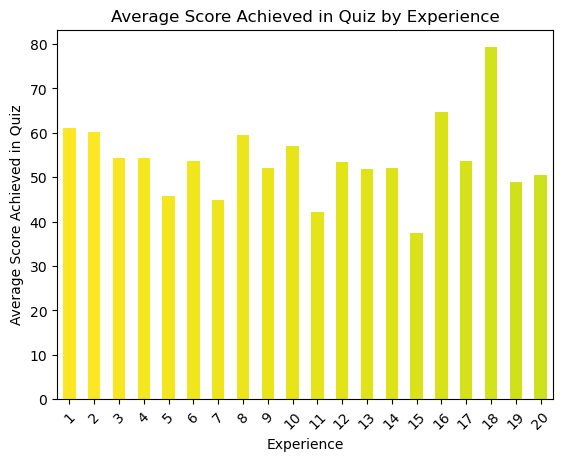

In [21]:
import matplotlib.pyplot as plt

# Grouping data by 'Experience' and calculating the mean score achieved in the quiz for each group
average_score_by_experience = df.groupby('EXPERIENCE')['SCOREACHIEVEDINQUIZ'].mean()

# Define a colormap
colors = plt.cm.viridis_r(range(len(average_score_by_experience)))

# Plotting the bar chart
average_score_by_experience.plot(kind='bar', color=colors)
plt.xlabel('Experience')
plt.ylabel('Average Score Achieved in Quiz')
plt.title('Average Score Achieved in Quiz by Experience')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

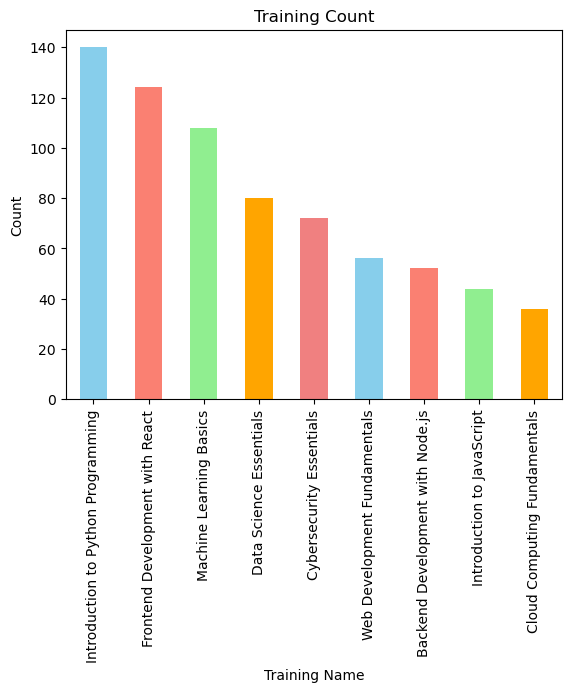

In [22]:
trainingname_counts = df['TRAININGNAME'].value_counts()

# Define custom colors for the bars
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral']

# Plotting the bar chart with custom colors
trainingname_counts.plot(kind='bar', color=colors)
plt.title('Training Count')
plt.xlabel('Training Name')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

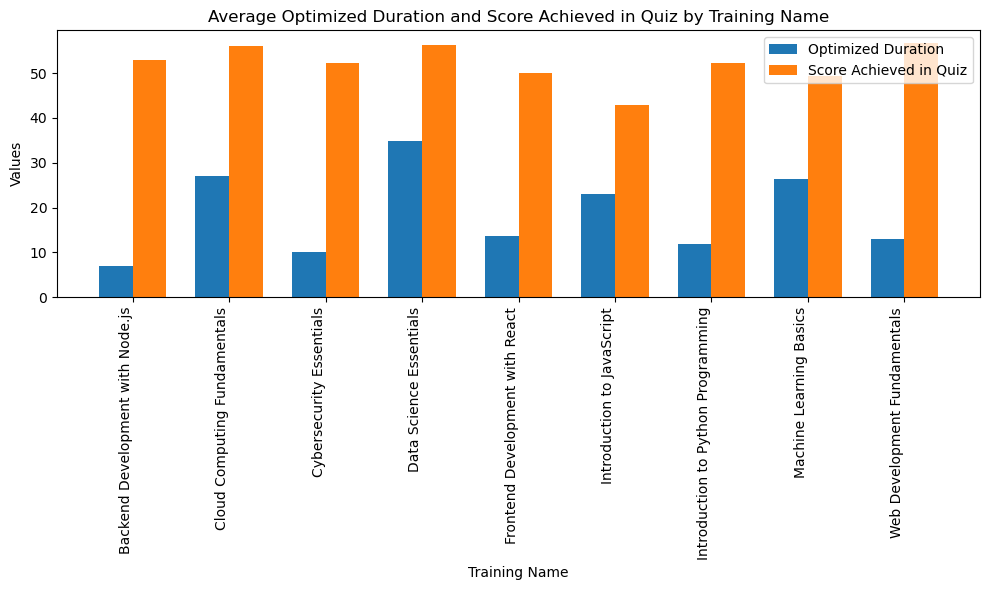

In [23]:
# Calculate the average OPTIMIZEDDURATION and SCOREACHIEVEDINQUIZ for each TRAININGNAME
average_values = df.groupby('TRAININGNAME')[['OPTIMIZEDDURATION', 'SCOREACHIEVEDINQUIZ']].mean().reset_index()

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(average_values))

bars1 = ax.bar(index, average_values['OPTIMIZEDDURATION'], bar_width, label='Optimized Duration')
bars2 = ax.bar([i + bar_width for i in index], average_values['SCOREACHIEVEDINQUIZ'], bar_width, label='Score Achieved in Quiz')

ax.set_xlabel('Training Name')
ax.set_ylabel('Values')
ax.set_title('Average Optimized Duration and Score Achieved in Quiz by Training Name')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(average_values['TRAININGNAME'], rotation=90, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

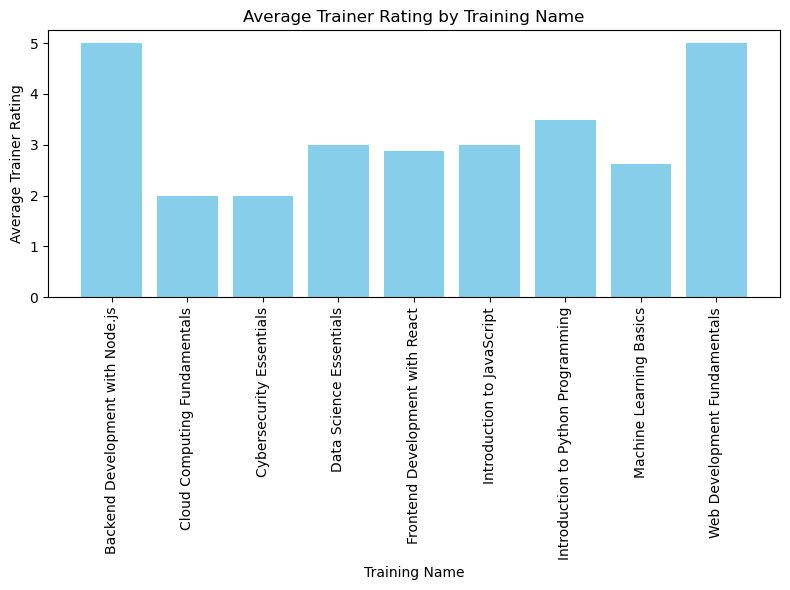

In [24]:
avg_rating_by_training = df.groupby('TRAININGNAME')['TRAINERRATING'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(avg_rating_by_training['TRAININGNAME'], avg_rating_by_training['TRAINERRATING'], color='skyblue')
plt.xlabel('Training Name')
plt.ylabel('Average Trainer Rating')
plt.title('Average Trainer Rating by Training Name')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

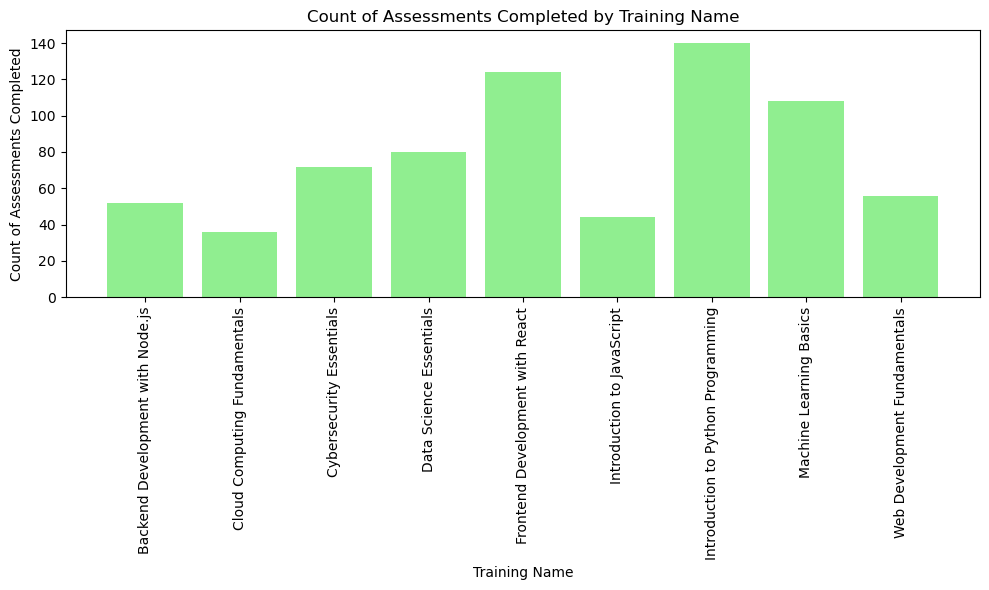

In [25]:
# Exclude rows where ASSESSMENT_COMPLETION_TIME_IN_HOURS is null or zero
filtered_df = df[df['ASSESSMENT_COMPLETION_TIME_IN_HOURS'].notna() & (df['ASSESSMENT_COMPLETION_TIME_IN_HOURS'] != 0)]

# Group by TRAININGNAME and count non-null or non-zero values of ASSESSMENT_COMPLETION_TIME_IN_HOURS
count_by_training = filtered_df.groupby('TRAININGNAME')['ASSESSMENT_COMPLETION_TIME_IN_HOURS'].count().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(count_by_training['TRAININGNAME'], count_by_training['ASSESSMENT_COMPLETION_TIME_IN_HOURS'], color='lightgreen')
plt.xlabel('Training Name')
plt.ylabel('Count of Assessments Completed')
plt.title('Count of Assessments Completed by Training Name')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## ML Modeling

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Assume df1 is your preprocessed DataFrame with features and target column 'SCOREACHIEVEDINQUIZ'

# Separate features and target variable
X = df[['GENDER', 'SPECIALIZATION', 'EXPERIENCE', 'DIFFICULTYLEVEL', 'TRAININGNAME', 'OPTIMIZEDDURATION', 'TRAINERRATING']]
y = df['ASSESSMENT_COMPLETION_TIME_IN_HOURS']

# Encode categorical variables
X_encoded = pd.get_dummies(X)

# Handle NaN values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Neural Network (MLPRegressor)': MLPRegressor(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name}: Mean Squared Error = {mse}")

# You can also perform cross-validation to get more reliable estimates of model performance
for name, model in models.items():
    scores = cross_val_score(model, X_imputed, y, cv=5, scoring='neg_mean_squared_error')
    mse_mean = -scores.mean()
    print(f"{name}: Cross-validated Mean Squared Error = {mse_mean}")


Linear Regression: Mean Squared Error = 1.8148223821801236e+20
Random Forest Regressor: Mean Squared Error = 64.54815817448029
Gradient Boosting Regressor: Mean Squared Error = 75.1272208622651
Support Vector Regressor: Mean Squared Error = 74.44988550805385
Neural Network (MLPRegressor): Mean Squared Error = 88.79584475874066
Linear Regression: Cross-validated Mean Squared Error = 2.7212576963050593e+20
Random Forest Regressor: Cross-validated Mean Squared Error = 121.03969096959493
Gradient Boosting Regressor: Cross-validated Mean Squared Error = 107.17083743924904
Support Vector Regressor: Cross-validated Mean Squared Error = 85.20791108767206
Neural Network (MLPRegressor): Cross-validated Mean Squared Error = 113.74628991243972


## Implementing Linear Regression Model for predicting assessment completing time

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Assume df1 is your preprocessed DataFrame with features and target column 'ASSESSMENT_COMPLETION_TIME_IN_HOURS'

# Separate features and target variable
X = df[['GENDER', 'SPECIALIZATION', 'EXPERIENCE', 'DIFFICULTYLEVEL', 'TRAININGNAME', 'OPTIMIZEDDURATION']]
y = df['ASSESSMENT_COMPLETION_TIME_IN_HOURS']

# Encode categorical variables
X_encoded = pd.get_dummies(X)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Handle NaN values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_encoded, test_size=0.2, random_state=42)

# Train the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

threshold = 2

# Convert regression predictions to binary classification labels
y_pred_binary = (y_pred <= threshold).astype(int)
y_test_binary = (y_test <= threshold).astype(int)

# Calculate accuracy for binary classification
accuracy = (y_pred_binary == y_test_binary).mean()

print(f"Accuracy: {accuracy*100} %")


Mean Squared Error: 3.0678746613193727e+21
Accuracy: 96.5034965034965 %


## Testing the model on dummy dataset

In [28]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Define dummy values for features
dummy_data = {
    'GENDER': ['Male'],
    'SPECIALIZATION': ['Docker'],
    'EXPERIENCE': [5],
    'DIFFICULTYLEVEL': ['moderate'],
    'TRAININGNAME': ['Machine Learning Basics'],
    'OPTIMIZEDDURATION': [8]
}

# Create DataFrame with dummy values
dummy_df = pd.DataFrame(dummy_data)

# Get the list of feature names used during training
training_feature_names = X_imputed.columns.tolist()

# Ensure that the dummy DataFrame has the same columns as training data
dummy_df = pd.get_dummies(dummy_df)
dummy_df = dummy_df.reindex(columns=training_feature_names, fill_value=0)

# Handle NaN values
imputer = SimpleImputer(strategy='mean')
dummy_imputed = pd.DataFrame(imputer.fit_transform(dummy_df), columns=dummy_df.columns)

# Make prediction
prediction = linear_regressor.predict(dummy_imputed)

# Print prediction
print("Predicted Completion Time:", int(prediction[0]) ,'hrs')


Predicted Completion Time: 15 hrs


## Implementing Linear Regression Model for predicting training score

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Assume df1 is your preprocessed DataFrame with features and target column 'ASSESSMENT_COMPLETION_TIME_IN_HOURS'

# Separate features and target variable
X = df[['GENDER', 'SPECIALIZATION', 'EXPERIENCE', 'DIFFICULTYLEVEL', 'TRAININGNAME', 'OPTIMIZEDDURATION']]
y = df['SCOREACHIEVEDINQUIZ']

# Encode categorical variables
X_encoded = pd.get_dummies(X)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Handle NaN values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_encoded, test_size=0.2, random_state=42)

# Train the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

threshold = 2

# Convert regression predictions to binary classification labels
y_pred_binary = (y_pred <= threshold).astype(int)
y_test_binary = (y_test <= threshold).astype(int)

# Calculate accuracy for binary classification
accuracy = (y_pred_binary == y_test_binary).mean()

print(f"Accuracy: {accuracy*100} %")


Mean Squared Error: 2.3733308427790765e+21
Accuracy: 95.1048951048951 %


## Testing the model on dummy dataset

In [30]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Define dummy values for features
dummy_data = {
    'GENDER': ['Male'],
    'SPECIALIZATION': ['Docker'],
    'EXPERIENCE': [10],
    'DIFFICULTYLEVEL': ['easy'],
    'TRAININGNAME': ['Machine Learning Basics'],
    'OPTIMIZEDDURATION': [800]
}

# Create DataFrame with dummy values
dummy_df = pd.DataFrame(dummy_data)

# Get the list of feature names used during training
training_feature_names = X_imputed.columns.tolist()

# Ensure that the dummy DataFrame has the same columns as training data
dummy_df = pd.get_dummies(dummy_df)
dummy_df = dummy_df.reindex(columns=training_feature_names, fill_value=0)

# Handle NaN values
imputer = SimpleImputer(strategy='mean')
dummy_imputed = pd.DataFrame(imputer.fit_transform(dummy_df), columns=dummy_df.columns)

# Make prediction
prediction = linear_regressor.predict(dummy_imputed)

# Print prediction
print("Predicted Score:", int(prediction[0]) ,' / 100')


Predicted Score: 74  / 100
